In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')

# OSEMN Pipeline 

* O - Obtaining our data
* S - Scrubbing / Cleaning our data
* E - EDA - Explorative Data Analysis or Exploring / Visualizing our data will allow us to find patterns and trends
* M - Modeling our data will give us our predictive power as a wizard
* N - INterpreting our data


For reference : https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_post_details%3BmDlg5VsdSBCLBps2R0vRZA%3D%3D

The **OSEMN pipeline** is a framework for handling the various stages of a **data science** or **machine learning** project. The acronym OSEMN stands for **O**btain, **S**crub, **E**xplore, **M**odel, and **I**Nterpret. Below is a breakdown of each step:

### Details

#### 1. **Obtain**
   - **Description**: This is the first step, where you collect the data needed for analysis. Data can come from various sources such as databases, APIs, web scraping, or public datasets.
   - **Key activities**:
     - Accessing datasets (e.g., downloading CSVs, querying SQL databases).
     - Integrating different data sources.
     - Storing the collected data for further use.

   **Example**:
   ```python
   import pandas as pd
   df = pd.read_csv('dataset.csv')
   ```

#### 2. **Scrub**
   - **Description**: Data in its raw form is often noisy and incomplete. This step focuses on cleaning the data to make it usable for analysis.
   - **Key activities**:
     - Handling missing values.
     - Removing duplicates or irrelevant data.
     - Correcting formatting issues or outliers.
     - Feature engineering and transformation.

   **Example**:
   ```python
   df = df.dropna()  # Removing rows with missing values
   df['date'] = pd.to_datetime(df['date'])  # Converting string to date format
   ```

#### 3. **Explore**
   - **Description**: This is the exploratory data analysis (EDA) phase, where you analyze the cleaned data to uncover patterns, correlations, and insights.
   - **Key activities**:
     - Descriptive statistics.
     - Visualizing data (e.g., histograms, scatter plots).
     - Identifying relationships between variables.
     - Testing hypotheses.

   **Example**:
   ```python
   import matplotlib.pyplot as plt
   df['feature'].hist()
   plt.show()
   ```

#### 4. **Model**
   - **Description**: This step involves applying machine learning algorithms to the data to build predictive models.
   - **Key activities**:
     - Selecting appropriate machine learning algorithms.
     - Splitting the data into training and testing sets.
     - Training the model and tuning its parameters.
     - Evaluating model performance using metrics like accuracy, precision, or F1 score.

   **Example**:
   ```python
   from sklearn.model_selection import train_test_split
   from sklearn.linear_model import LogisticRegression
   from sklearn.metrics import accuracy_score
   
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
   model = LogisticRegression()
   model.fit(X_train, y_train)
   predictions = model.predict(X_test)
   print("Accuracy:", accuracy_score(y_test, predictions))
   ```

#### 5. **INterpret**
   - **Description**: In this final step, you make sense of the model results and derive actionable insights from the predictions.
   - **Key activities**:
     - Understanding how features impact the model’s predictions.
     - Communicating results effectively through visualizations, reports, or presentations.
     - Using interpretability techniques like SHAP or LIME to explain complex models.

   **Example**:
   ```python
   import shap
   explainer = shap.LinearExplainer(model, X_train)
   shap_values = explainer.shap_values(X_test)
   shap.summary_plot(shap_values, X_test)
   ```

## About the Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database.

In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Download from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [37]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

print(diabetes_data.sample(5))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
15             7      100              0              0        0  30.0   
105            1      126             56             29      152  28.7   
192            7      159             66              0        0  30.4   
179            5      130             82              0        0  39.1   
682            0       95             64             39      105  44.6   

     DiabetesPedigreeFunction  Age  Outcome  
15                      0.484   32        1  
105                     0.801   21        0  
192                     0.383   36        1  
179                     0.956   37        1  
682                     0.366   22        0  


# Basic EDA and statistical analysis


In [38]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of non-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [39]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
## for reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe
diabetes_data.describe()

## Also see :
##to return columns of a specific dtype: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [40]:
diabetes_data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

### The Question creeping out of this summary

#### Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

#### It is better to replace zeros with NaN since after that counting them would be easier and zeros need to be replaced with suitable values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


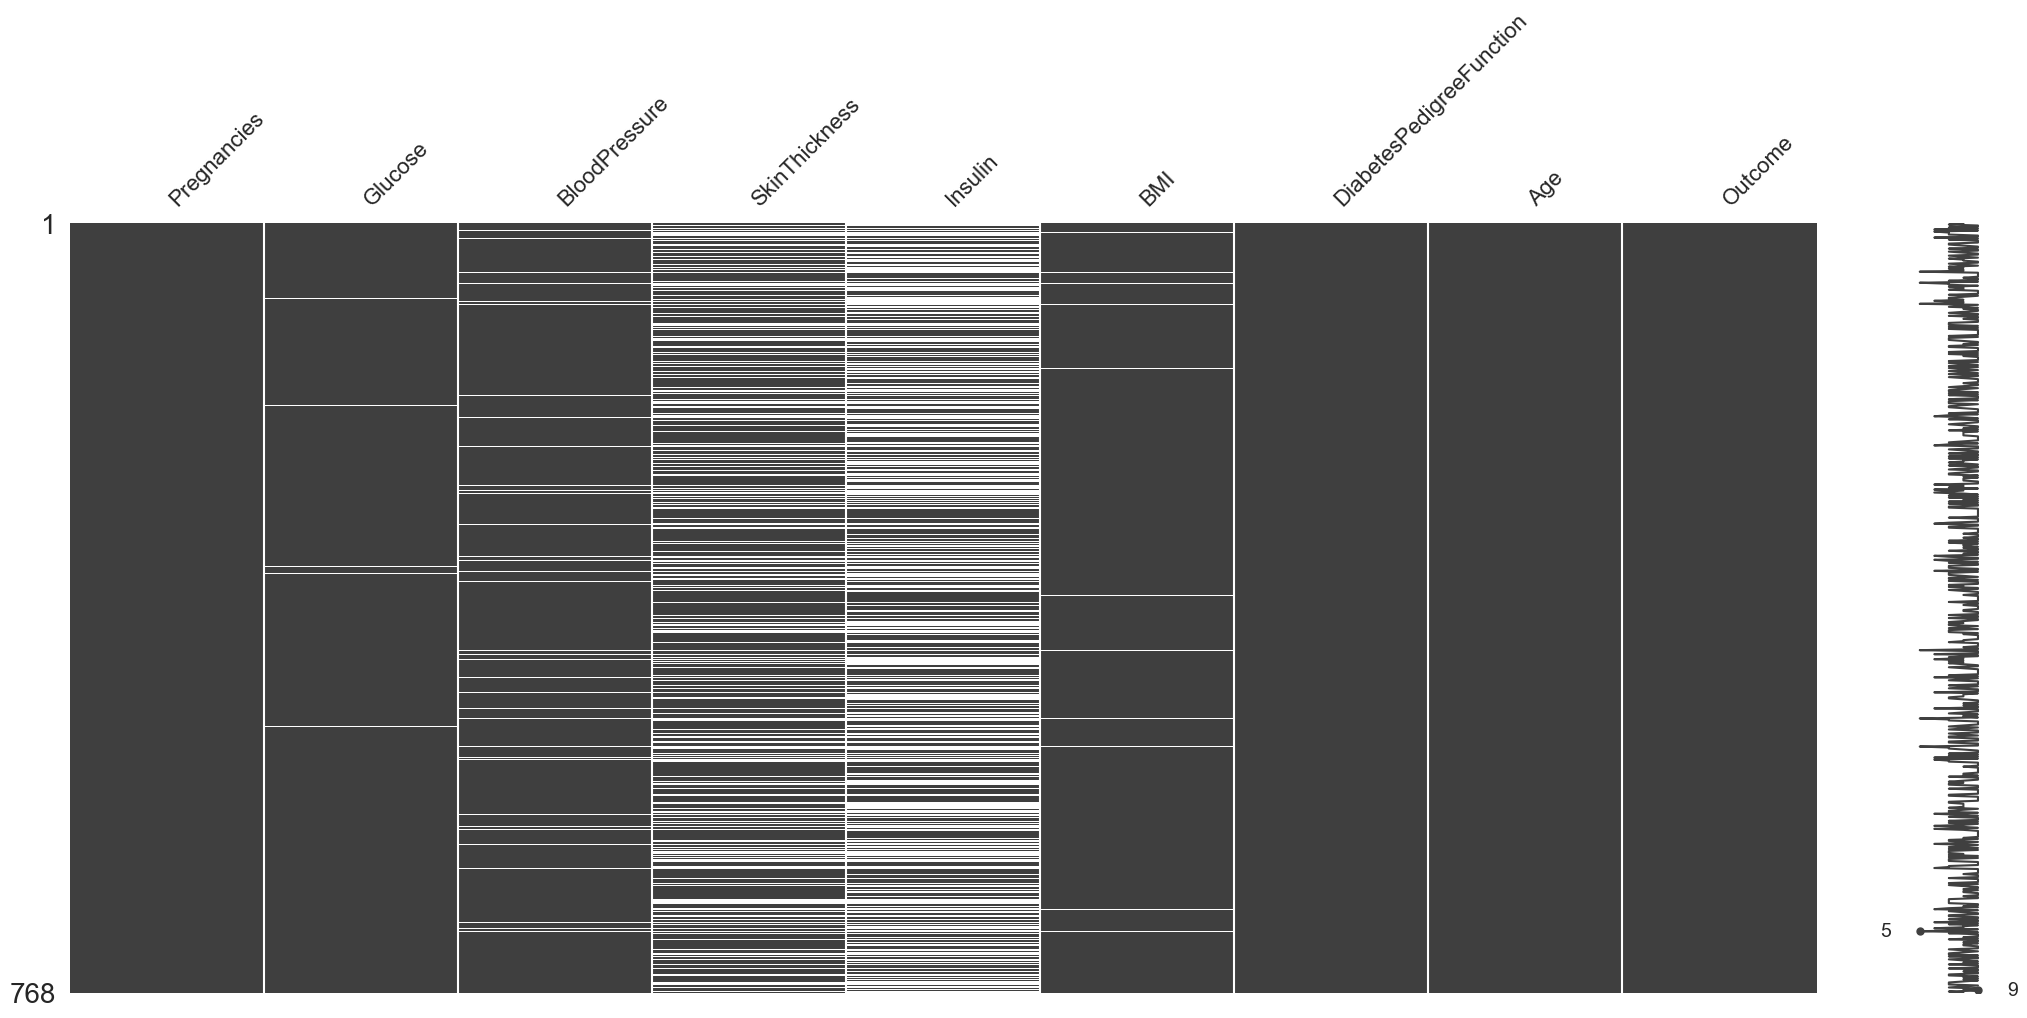

In [41]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

## null count analysis
import missingno as msno
#p=msno.bar(diabetes_data_copy)
p=msno.matrix(diabetes_data_copy)

#### To fill these NaN values the data distribution needs to be understood

But why? -> Understanding the distribution of your data is crucial when deciding how to handle missing values (NaNs) for several reasons:

1. **Choosing the Right Imputation Method**: Different data distributions might require different imputation methods. For instance, for normally distributed data, the mean might be a good choice. However, for skewed data, the median might be more appropriate. 

2. **Avoiding Bias**: Blindly filling NaN values without understanding the distribution can introduce bias. For example, using the mean to fill NaN values in a highly skewed dataset can shift the overall distribution and lead to misleading results in subsequent analyses.

3. **Identifying Outliers**: Before imputing missing values, it's essential to identify and handle outliers. An understanding of the data distribution can help in this process. Filling NaNs without considering outliers can again introduce bias.

4. **Data Nature and Patterns**: Sometimes, the nature of missingness itself can be dependent on the distribution of the data. For example, data might be missing more frequently for extreme values. Knowing this can influence the imputation method you choose.

5. **Considering Model Assumptions**: Many statistical models and machine learning algorithms assume specific data distributions (e.g., linear regression assumes normally distributed residuals). If you don't fill NaNs considering the distribution, you might end up violating these assumptions, leading to unreliable predictions or inferences.

6. **Understanding Underlying Mechanisms**: There are different mechanisms that cause missing data: Missing Completely at Random (MCAR), Missing at Random (MAR), and Missing Not at Random (MNAR). Understanding the distribution and patterns in your data can help diagnose which mechanism is at play, which in turn can guide your imputation strategy.

7. **Evaluating the Impact of Imputation**: After imputing missing values, it's essential to compare the distribution of the imputed data to the original data to ensure that the imputation hasn't significantly altered the data characteristics.

8. **Choosing Advanced Imputation Methods**: More sophisticated imputation methods, like model-based imputation (e.g., KNN imputation, regression imputation, or using algorithms like MICE), require an understanding of the data distribution to be effectively applied.

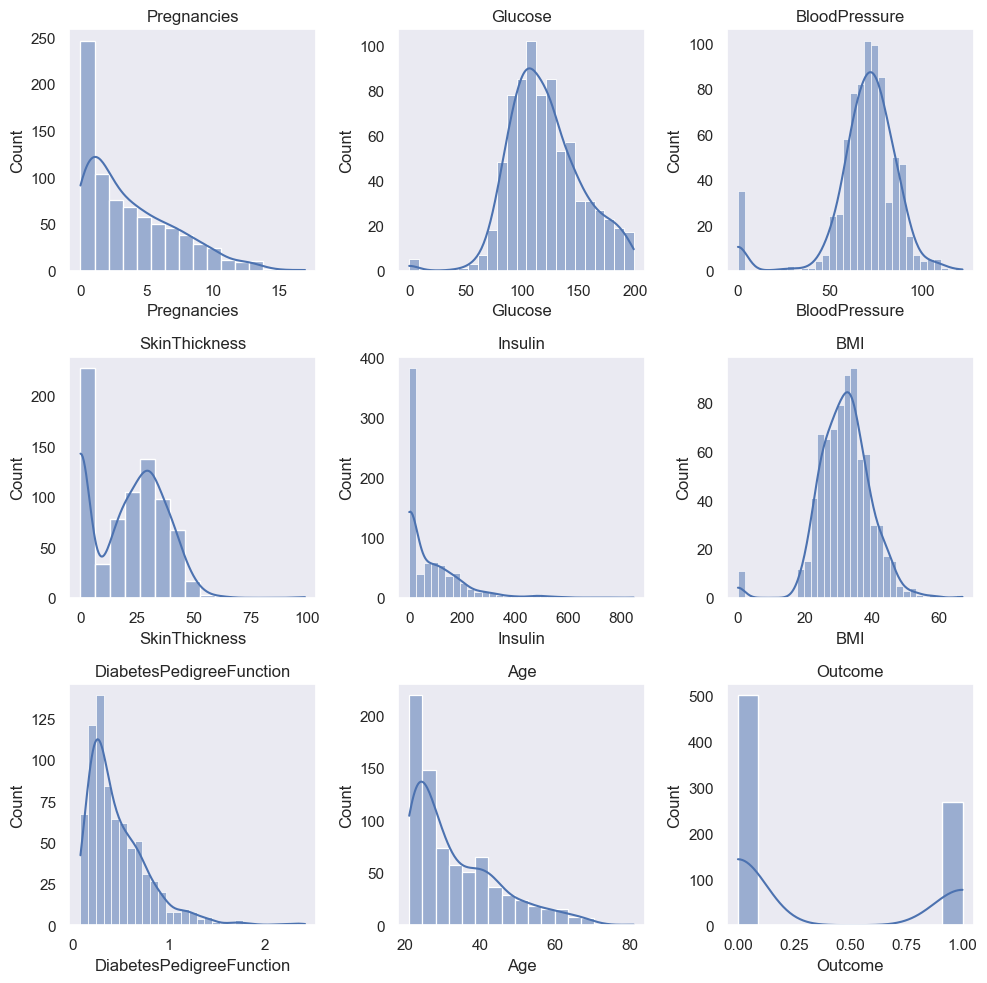

In [42]:
# Number of columns in your dataframe
num_columns = len(diabetes_data.columns)

# Set up subplots with specified number of rows and columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for ax, column in zip(axes.ravel(), diabetes_data.columns):
    sns.histplot(diabetes_data[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.grid()

plt.tight_layout()
plt.show()

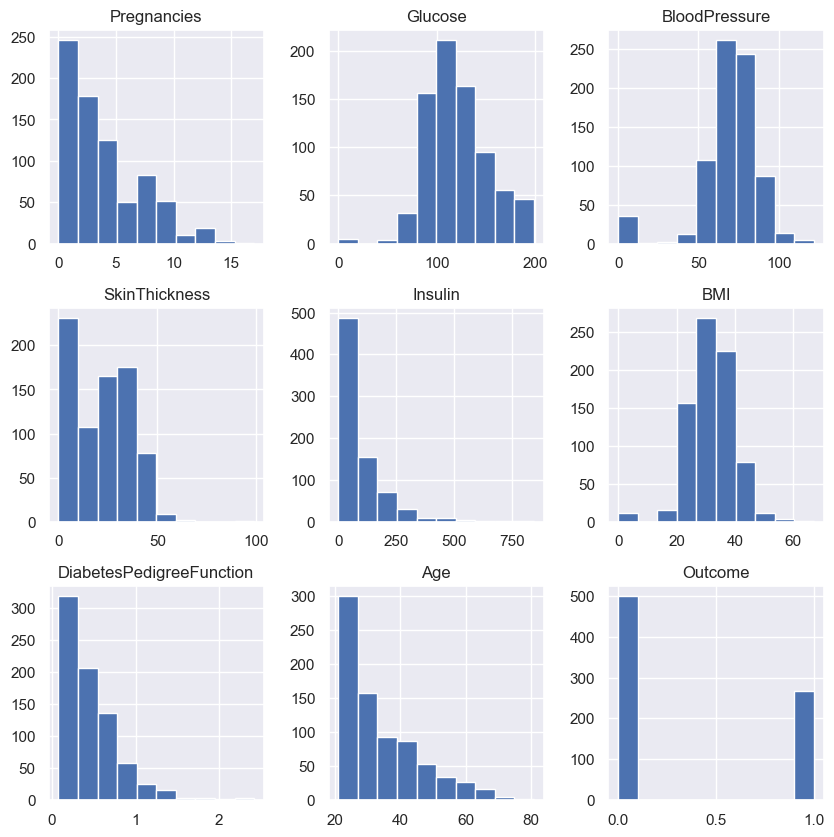

In [43]:
# or simply
p = diabetes_data.hist(figsize = (10,10))

# Mean or Median?



## Mean (or Average)

- The mean is calculated by adding up all the numbers in a dataset and then dividing by the count of those numbers.
  
  mean = sum(vals) / count(vals)
  
- The mean is sensitive to extreme values or outliers. A single very high or very low value can significantly change the mean.

---

## Median

- The median is the middle value in a dataset when the numbers are arranged in ascending or descending order. 
- If there's an odd number of values, the median is the middle one.
- If there's an even number of values, the median is the average of the two middle numbers.
  
- The median is resistant to outliers. Extreme values, either very high or very low, do not affect the median as much as they do the mean.

---

### Differences

1. **Calculation**: Mean is the sum of all values divided by the number of values. Median is the middle value when data is arranged in order.
  
2. **Sensitivity to Outliers**: Mean is affected by outliers, whereas median is more robust and less sensitive to them.

3. **Representation**: In a skewed distribution, the mean tends to be pulled in the direction of the skew, while the median tends to resist this pull and remains more centrally located.



### Aiming to impute NaN values for the columns in accordance with their distribution

In [44]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

## Plotting after NaN removal 

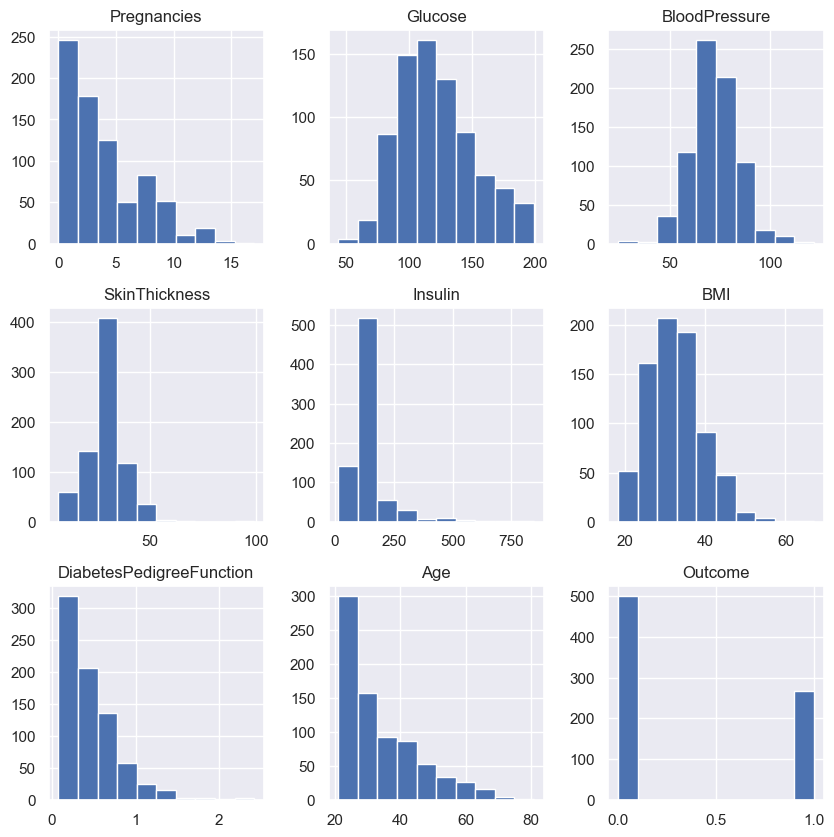

In [45]:
p = diabetes_data_copy.hist(figsize = (10,10))

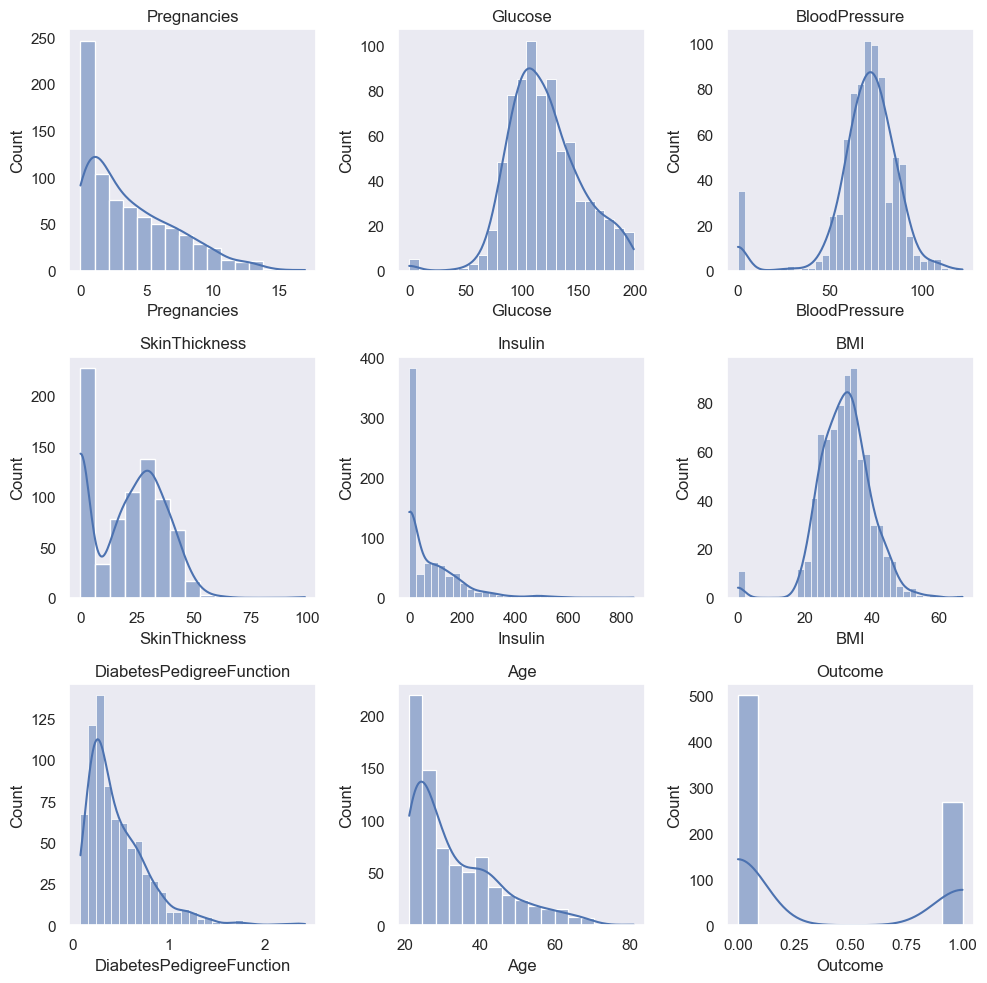

In [46]:
# Number of columns in your dataframe
num_columns = len(diabetes_data.columns)

# Set up subplots with specified number of rows and columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for ax, column in zip(axes.ravel(), diabetes_data.columns):
    sns.histplot(diabetes_data[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.grid()

plt.tight_layout()
plt.show()

## Skewness

A ***left-skewed distribution*** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A ***right-skewed distribution*** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


![](https://www.statisticshowto.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)


In both types of skewness, it's crucial to recognize that the "tail" reflects the range of values with fewer observations, while the peak (or mode) indicates the most frequently occurring values. Understanding the skewness direction can provide insights into the nature of the data, potential outliers, and the overall distribution of values in a dataset. It also offers hints about the central tendencies and how they relate to one another within the dataset.



### Left-Skewed Distribution (Negative Skewness)

A ***left-skewed distribution***, also known as a negatively-skewed distribution, has a tail that stretches out further to the left, and not to the right. Here are some key features and implications:

1. **Tail Direction**: The "tail" in a left-skewed distribution refers to the part of the distribution that has an extended range of values with fewer data points, which extends towards the left side of the graph.

2. **Central Tendency Observations**: In a left-skewed distribution, the mean (average) is typically less than the median, and the median is less than the mode. This is due to the influence of the extended tail pulling the average value in the direction of the skew.

3. **Real-world Examples**: Examples might include age at retirement from a job that most people retire from relatively young, or scores on a difficult exam where most participants score high.

4. **Implications for Analysis**: Left-skewed distributions can influence assumptions made in statistical testing and modeling. For instance, certain parametric tests might require data to be approximately normally distributed, so recognizing and addressing skewness can be essential.


### Right-Skewed Distribution (Positive Skewness)

A ***right-skewed distribution***, sometimes termed as having positive skewness, has a tail that stretches out to the right, towards the higher numbers. Here are its characteristics and implications:

1. **Tail Direction**: In a right-skewed graph, the tail part of the distribution is more stretched out to the right, rather than to the left, suggesting an extended range of higher values with fewer data points populating them.

2. **Central Tendency Observations**: For right-skewed distributions, the mean is generally greater than the median, and the median is greater than the mode, indicating the influence of the tail on the average value of the distribution.

3. **Real-world Examples**: Situations that might produce right-skewed data include income distributions in economies where a few individuals amass significant wealth, or the lifespan of a product where most items might fail early on, but some last significantly longer.

4. **Implications for Analysis**: Like with left-skewed distributions, right-skewed distributions may require transformations or alternative analytical methods if the analysis assumes normally-distributed data.


Learn more about skewness on https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

In [47]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

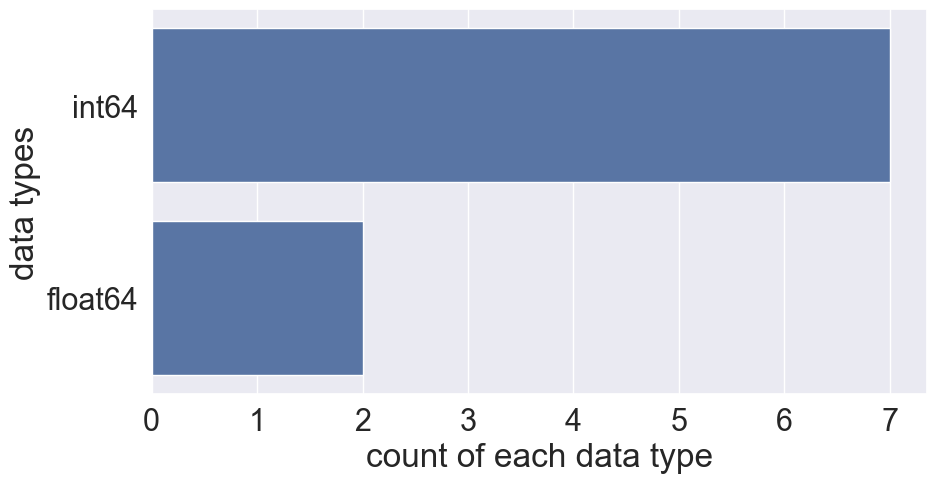

In [48]:
## data type analysis
plt.figure(figsize=(10,5))
sns.set(font_scale=2)
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

## Null count analysis

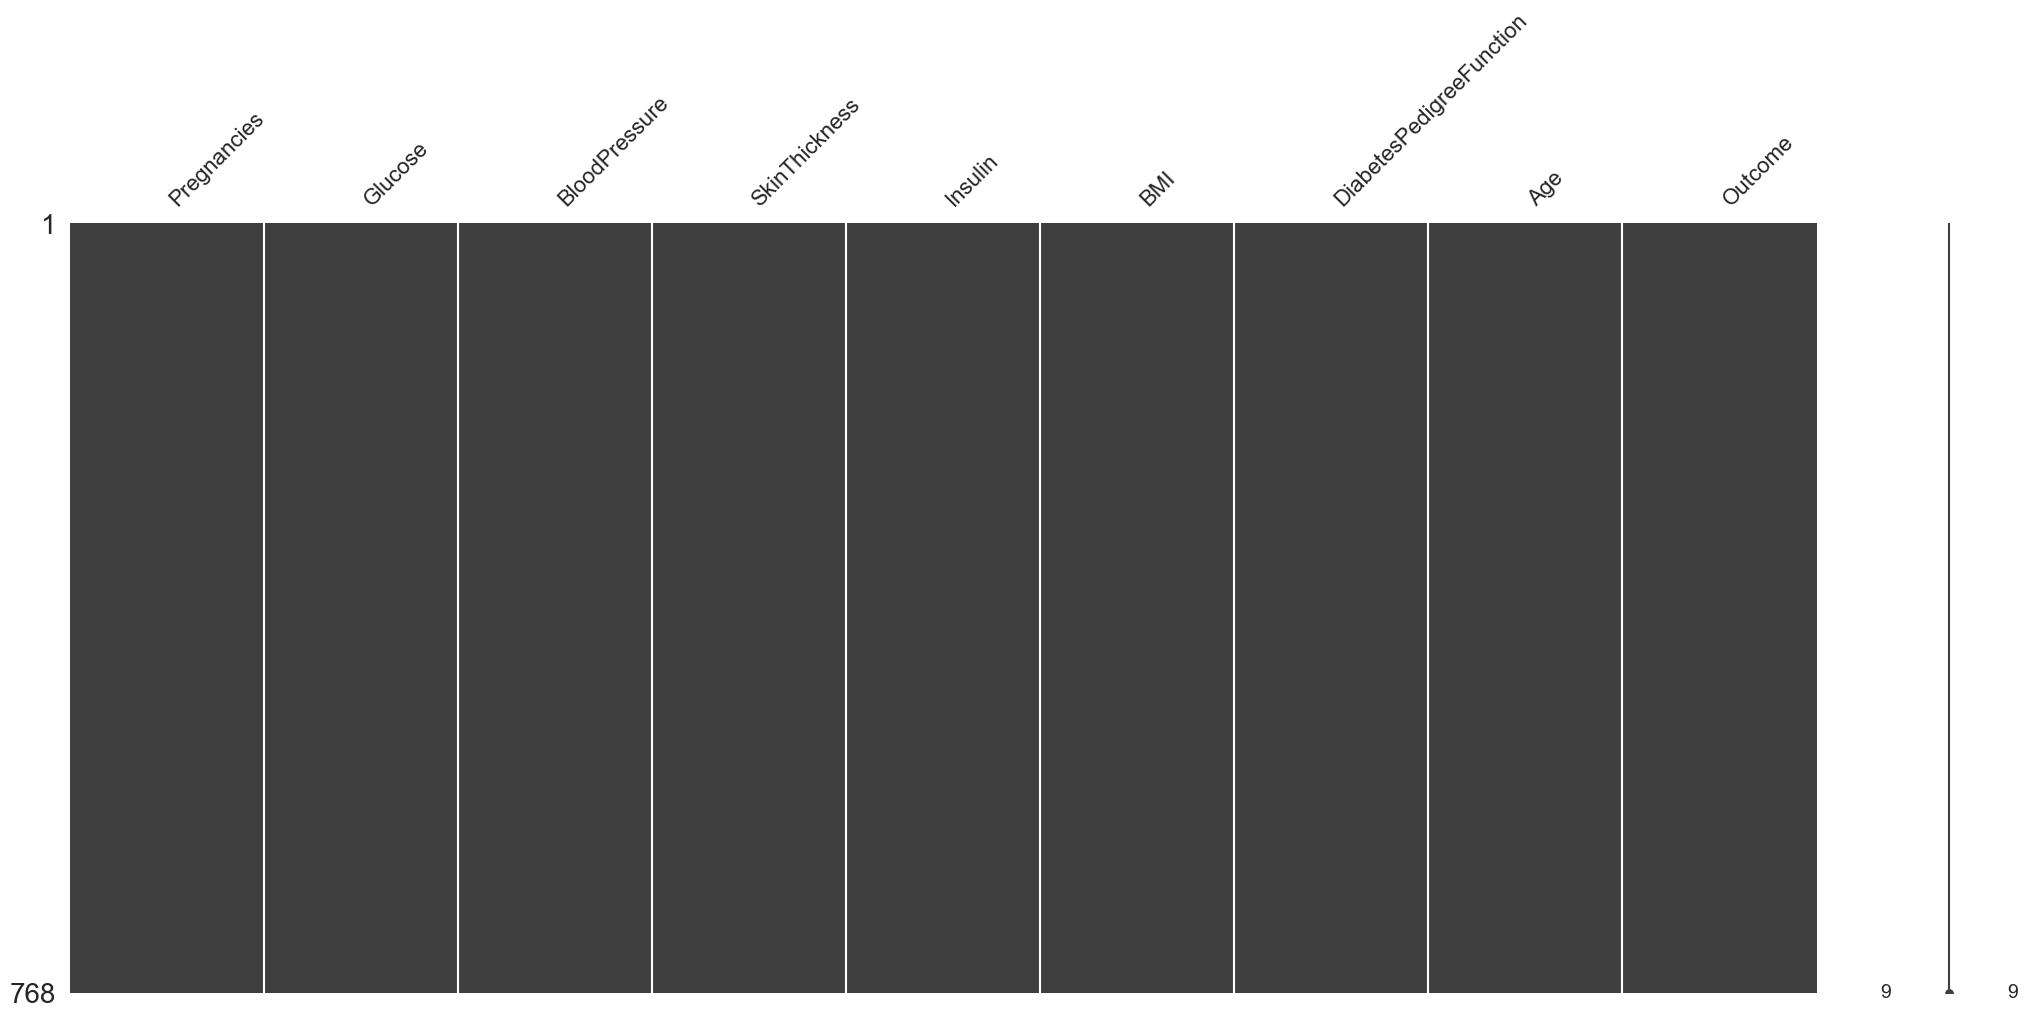

In [49]:
import missingno as msno
#p=msno.bar(diabetes_data)
p=msno.matrix(diabetes_data)

Outcome
0    500
1    268
Name: count, dtype: int64


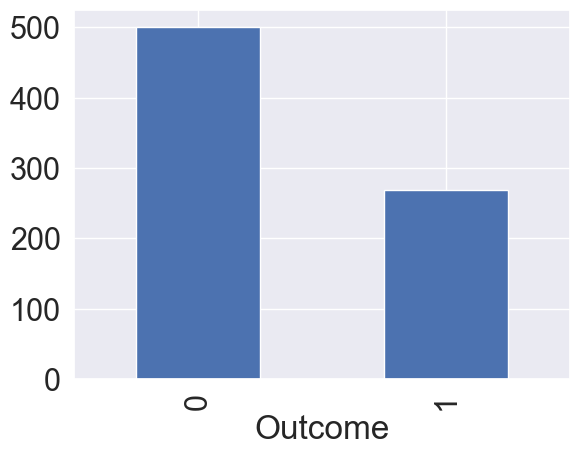

In [50]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")


#### The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

#### Scatter matrix of uncleaned data

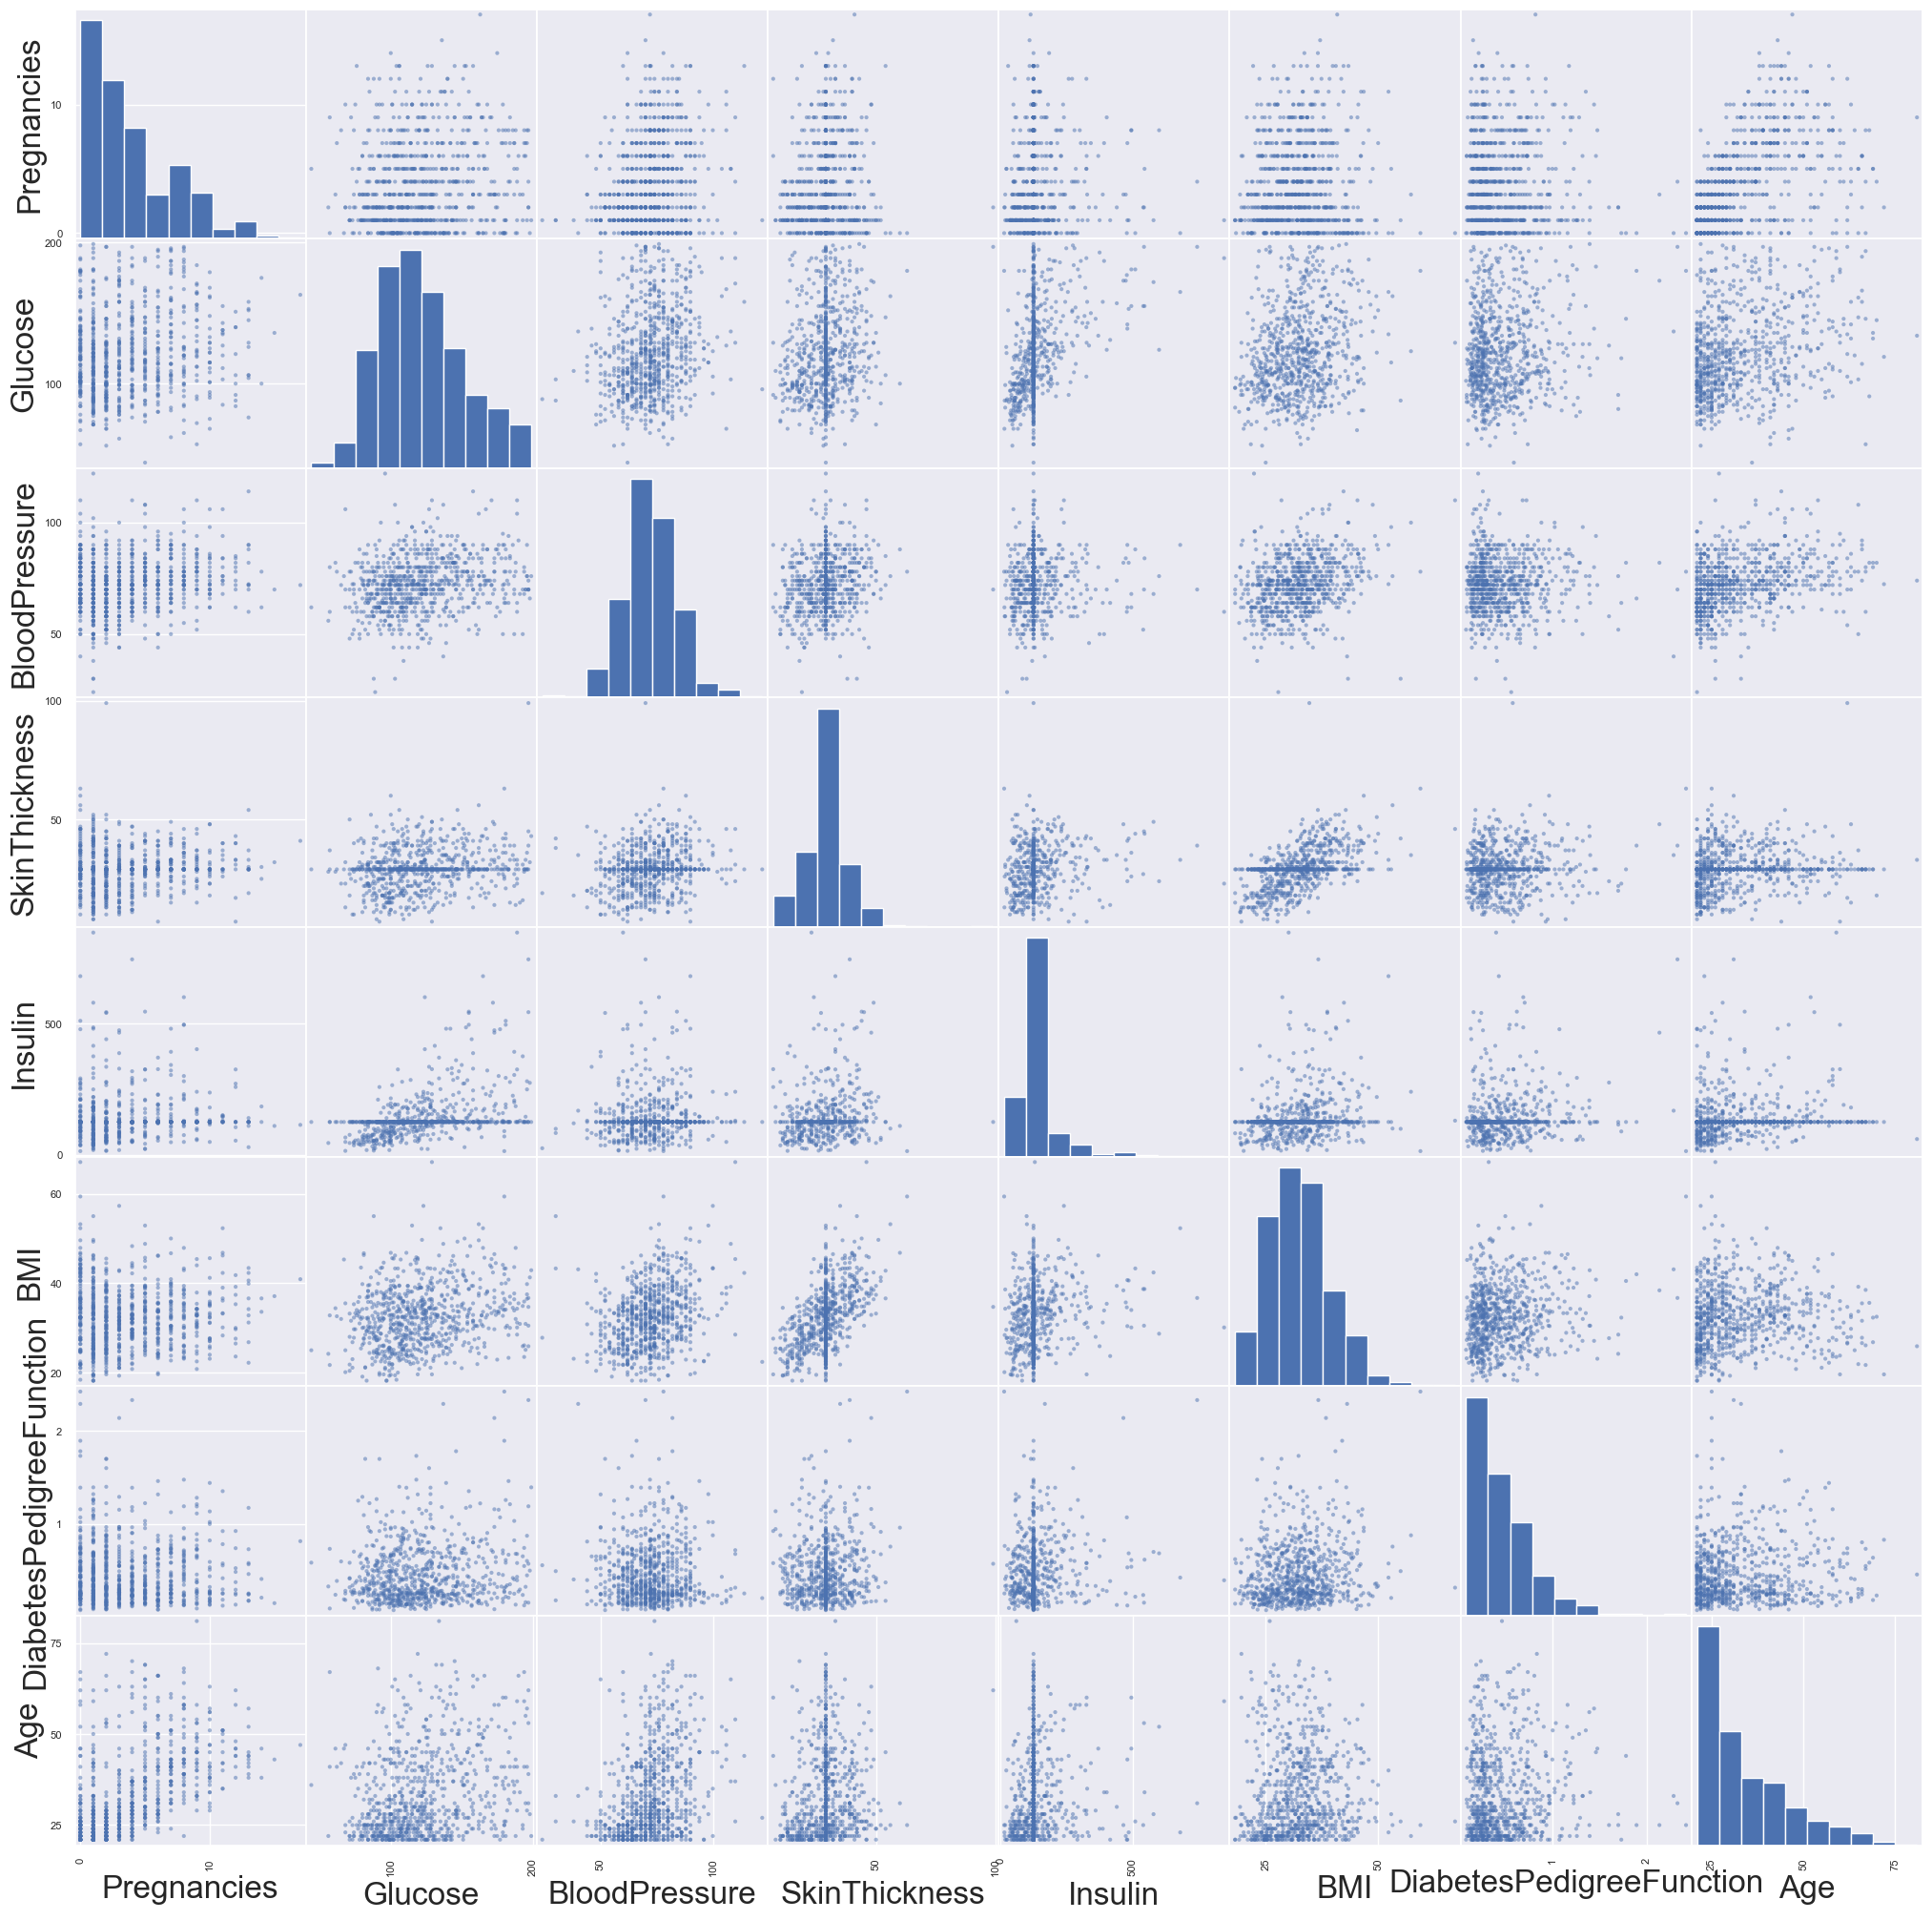

In [51]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data_copy.drop("Outcome", axis=1),figsize=(25, 25))

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

For Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

#### Pair plot for clean data

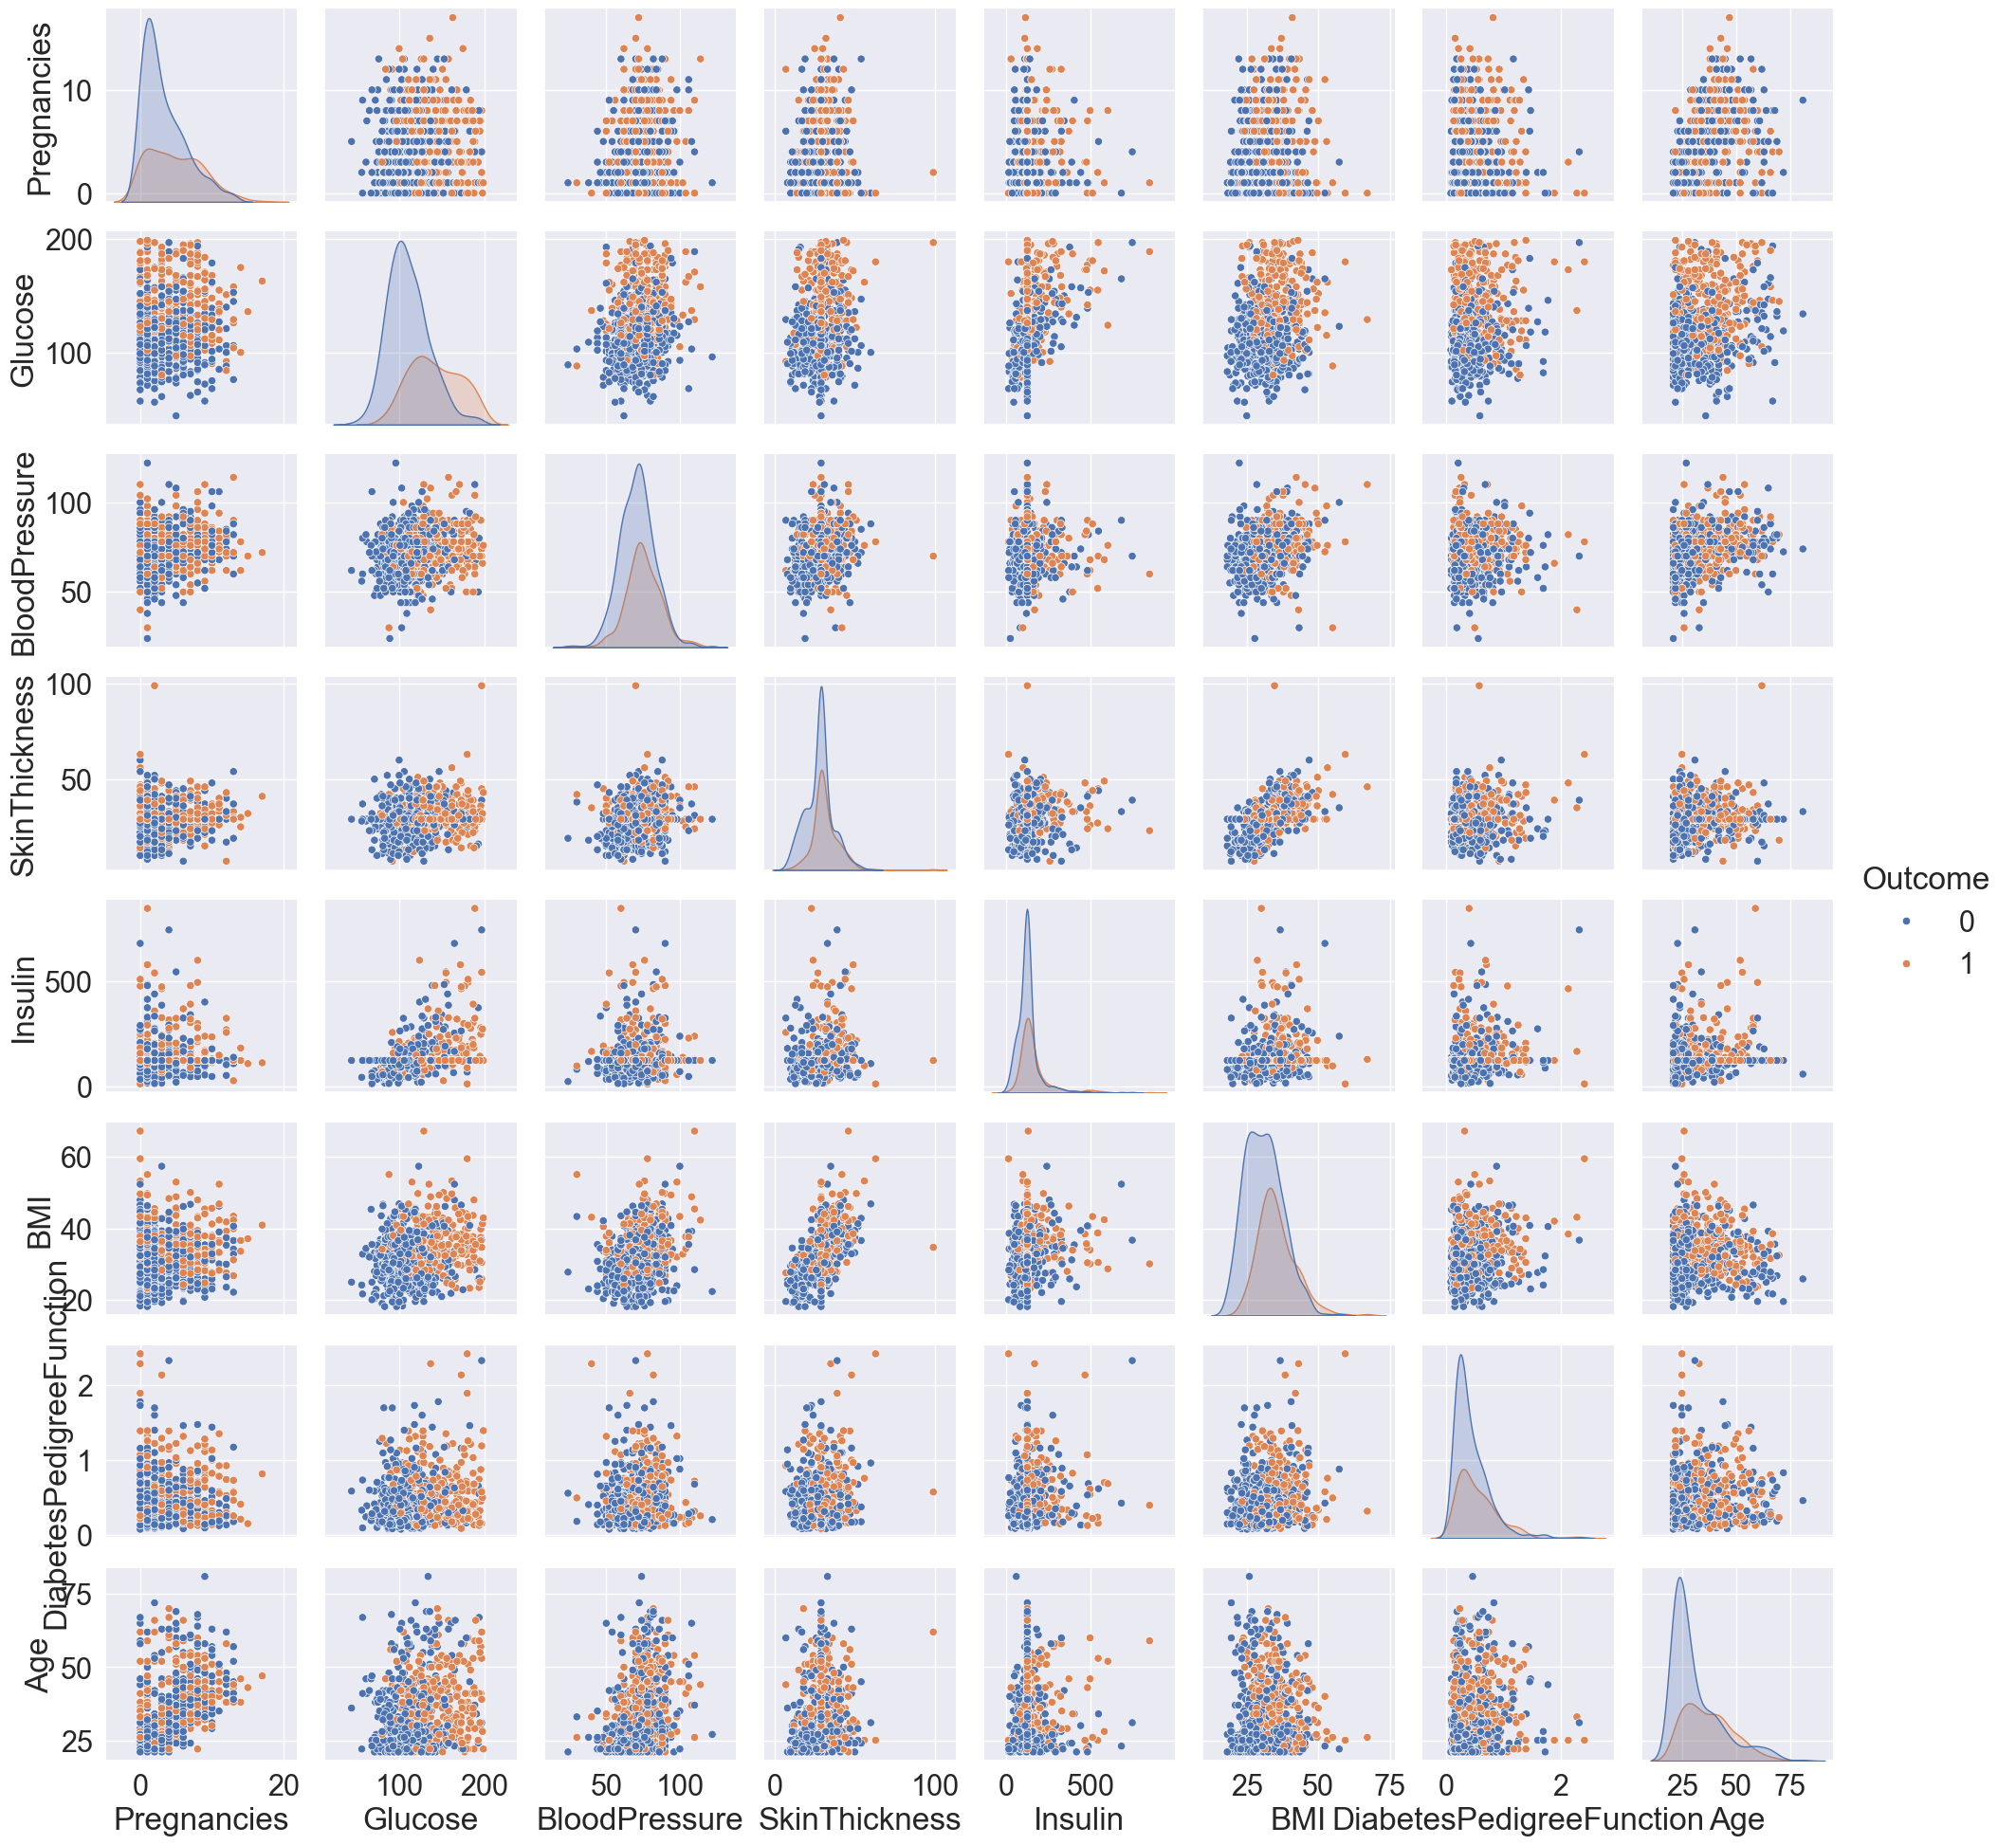

In [52]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

## Pearson's Correlation Coefficient

The Pearson Correlation Coefficient, often denoted by \( r \), is a statistical metric that measures the linear relationship between two variables. It is one of the most widely used correlation coefficients and provides insights into the direction and strength of the linear relationship between the two variables.

Here are some key points about the Pearson Correlation Coefficient:

1. **Range**: The coefficient \( r \) ranges between -1 and 1.
    - \( r = 1 \): Perfect positive linear correlation. This means that as one variable increases, the other variable increases proportionally.
    - \( r = -1 \): Perfect negative linear correlation. This means that as one variable increases, the other decreases proportionally.
    - \( r = 0 \): No linear correlation. It's important to note that this does not necessarily mean there is no relationship, but rather that there is no *linear* relationship.


2. **Computation**: The formula for \( r \) is given by:
   \[ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} \]
   Where:
   - \( x_i \) and \( y_i \) are individual data points.
   - \( \bar{x} \) and \( \bar{y} \) are the means of the \( x \) and \( y \) data sets, respectively.


3. **Causation vs. Correlation**: A high Pearson correlation coefficient (close to 1 or -1) indicates a strong linear relationship, but it does not indicate causation. Just because two variables are correlated doesn't mean one causes the other.


4. **Limitations**: 
    - Pearson correlation only captures linear relationships. If the relationship is nonlinear, \( r \) might be close to zero even if there is a strong relationship.
    - Outliers can have a strong effect on the coefficient. A single outlier can significantly change the value of \( r \).
    - It assumes that the data is normally distributed, and the variables have constant variance (homoscedasticity).


5. **Applications**: The coefficient is used in various fields, from finance to biology, to determine the linear relationships between variables. It's frequently used in regression analysis and is the basis for parametric tests that compare means of normally distributed data.

In summary, the Pearson Correlation Coefficient is a measure of the strength and direction of a linear relationship between two variables.

## Heatmap

A heatmap of a correlation matrix is a graphical representation where individual values in the matrix are represented as colors. The primary purpose of this visualization is to easily and quickly discern patterns and relationships among multiple variables at once. When used for correlations, it provides a visual summary of how variables relate to each other.

Key aspects of a heatmap of a correlation:

1. **Color Spectrum**: Heatmaps usually employ a color spectrum or gradient to represent values. Commonly, a gradient from a cool color (like blue) to a warm color (like red) is used. Blue might indicate negative correlations, white (or a neutral color) indicates no correlation, and red indicates positive correlations. The darker the shade, the stronger the correlation.

2. **Scale**: Alongside the heatmap, there's usually a colorbar or legend which indicates what numerical values the colors correspond to. This helps in interpreting the strength of the correlation visually.

3. **Symmetry**: Since a correlation matrix is symmetrical around its main diagonal, the top-right triangle of the matrix is a mirror image of the bottom-left triangle. Both triangles convey the same information. Hence, sometimes only one half of the heatmap is shown for clarity.

4. **Annotations**: Many heatmaps also include numerical annotations within the cells. This allows the viewer to not only see the color representation but also the exact correlation coefficient.

5. **Hierarchical Clustering (Optional)**: Some heatmaps might reorder the rows and columns based on similarity (hierarchical clustering) to group variables with similar patterns together. This can make patterns more evident, especially in larger datasets.

6. **Applications**:
   - **Exploratory Data Analysis**: Quickly identify variables that are closely related or have no relationship.
   - **Feature Selection**: In machine learning, strong correlations between independent variables (multicollinearity) can be problematic. A heatmap can help in spotting and addressing this.
   - **Domain Understanding**: Understand which variables or features in a dataset move together, which can lead to better domain understanding or insights.

7. **Interpretation**: 
   - A block of cells with a warm color (e.g., red) indicates variables that are positively correlated.
   - A block of cells with a cool color (e.g., blue) indicates variables that are negatively correlated.
   - Cells colored with a neutral color (e.g., white or gray) indicate little to no correlation.

The heatmap of a correlation matrix is a powerful tool to visualize and understand the relationships among multiple variables simultaneously. It offers an immediate visual summary of the data's structure, which can then be analyzed more deeply with other statistical methods or tools.

#### Heatmap for unclean data

Colormaps reference https://matplotlib.org/stable/users/explain/colors/colormaps.html

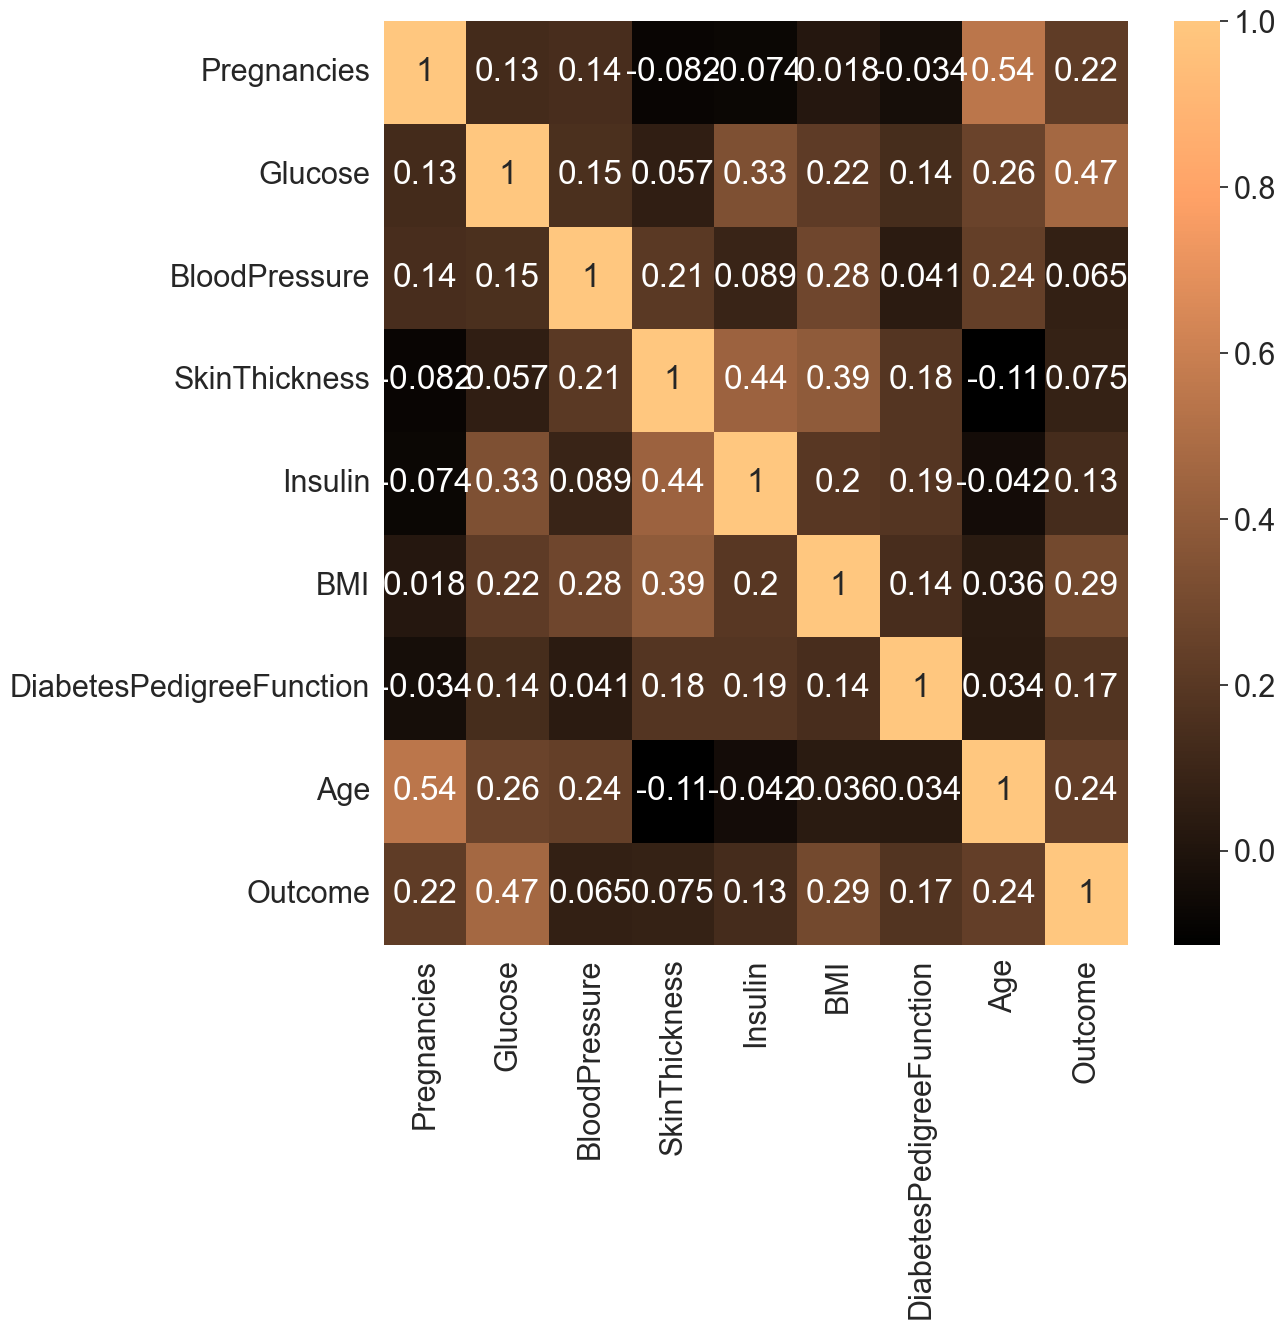

In [53]:
plt.figure(figsize=(12,12))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True, cmap ='copper')  # seaborn has very simple solution for heatmap

#### Heatmap for clean data

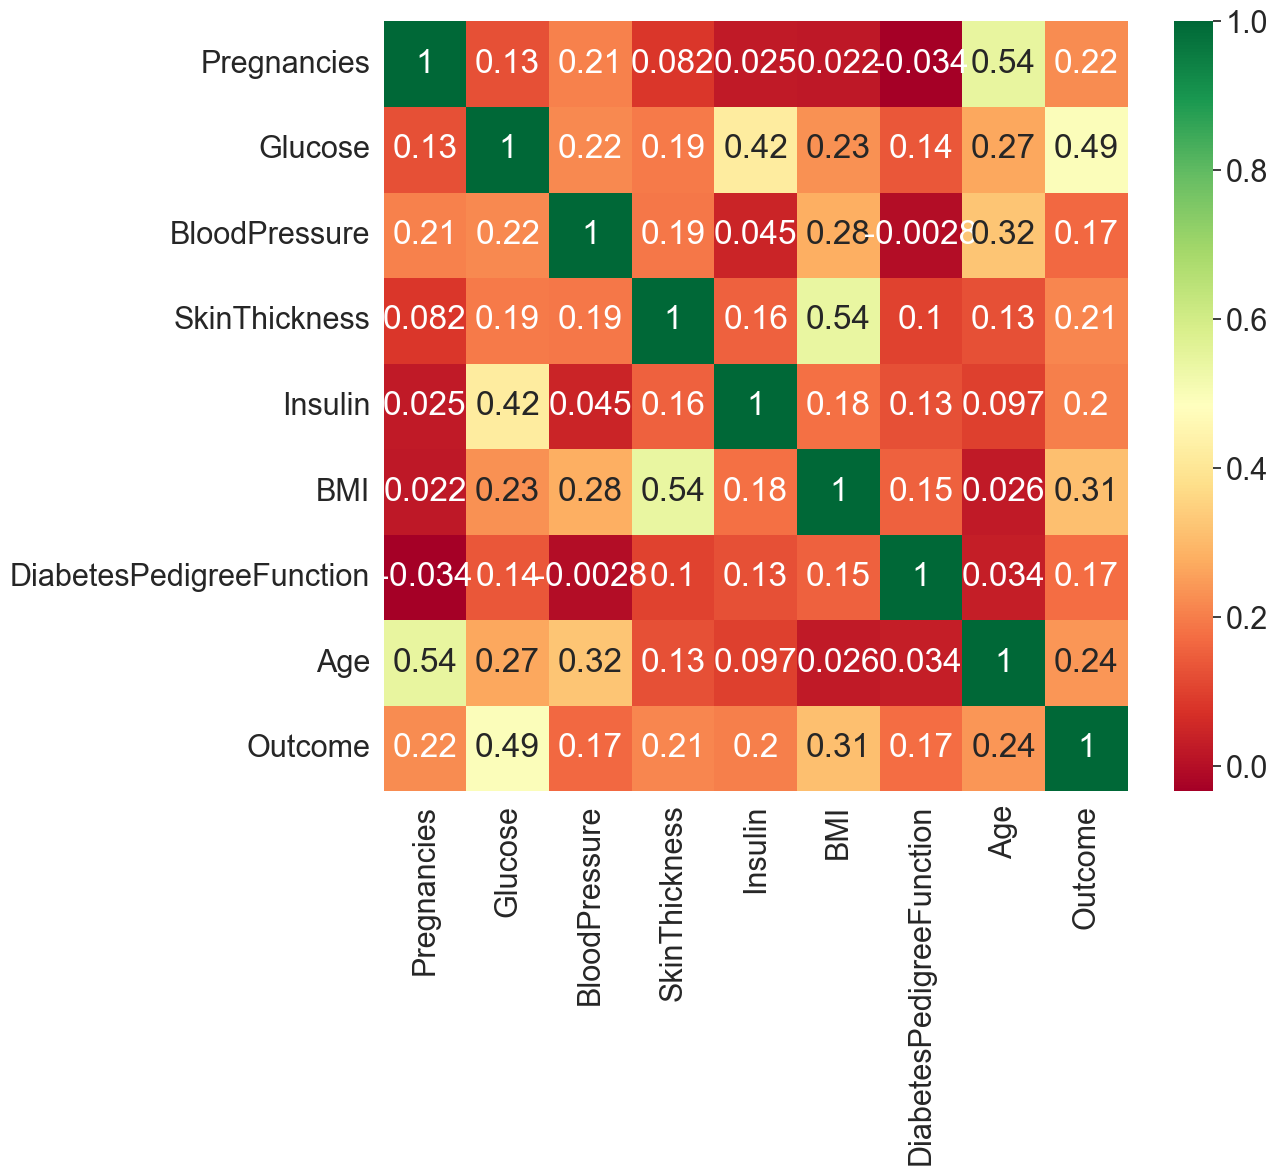

In [54]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

## Scaling the data 
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:

![](https://cdn-images-1.medium.com/max/800/0*PXGPVYIxyI_IEHP7.)


#### to learn more about scaling techniques
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

## StandardScaler

`StandardScaler` is a preprocessing technique used in machine learning and statistics. It standardizes the features of a dataset by removing the mean and scaling each feature to unit variance. This process can be crucial for the performance of many algorithms, especially those that are sensitive to the scale of features.

### Key Features:

- **Formula**:
  Given a feature with values \( x_1, x_2, ... x_n \), the standardized value \( z \) for a given value \( x \) is:
  \[ z = \frac{x - \mu}{\sigma} \]
  Where:
  - \( \mu \) is the mean of the feature.
  - \( \sigma \) is the standard deviation of the feature.

- **Functionality**:
  1. **Centering**: Subtracting the mean of the feature from each data point, which centers the data around zero.
  2. **Scaling**: Dividing each data point by the standard deviation, which scales the data to have a standard deviation of 1.

- **Assumption**:
  `StandardScaler` assumes that the data is approximately normally distributed. If the data has a skewed distribution, other scalers like `MinMaxScaler` or `RobustScaler` might be more appropriate.

- **Significance in Algorithms**:
  Algorithms such as Support Vector Machines (SVM) or Principal Component Analysis (PCA) often assume that all features are centered around zero with similar variance. Features with substantially larger variance than others can dominate some algorithms, making them less effective.

- **Fit vs. Transform**:
  When working with both training and test data, it's important to fit the `StandardScaler` on the training data only. Then, use that fitted scaler to transform both the training and test data sets. This ensures consistent scaling.

In [55]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [56]:
X.sample(5)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
478     1.233880  0.141808       0.131929       1.012114 -0.760736 -0.954082   
67     -0.547919 -0.417106       1.620951      -0.012301 -0.181541  1.491084   
402     0.342981  0.470581       0.959163       1.353586 -0.610145  0.370383   
450    -0.844885 -1.304793      -0.695306      -1.833485 -0.529058 -1.638146   
432    -0.844885 -1.370548       0.131929      -2.061133 -0.934494 -0.357345   

     DiabetesPedigreeFunction       Age  
478                 -0.935863  0.490030  
67                   1.126878  1.766346  
402                 -0.561368  0.149679  
450                 -0.171773 -0.871374  
432                  0.166480 -0.956462

In [57]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

### Why Scaling the data for KNN?

#### it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.
##### Let's see an example of distance calculation using two features whose magnitudes/ranges vary greatly.
Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

#### We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.

## Test Train Split and Cross Validation methods


**Train Test Split** involves dividing the dataset into two separate sets: one for training the model and the other for testing its performance.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

 This separation is crucial for various reasons:

1. **Avoid Overfitting**:
   - **What is Overfitting?** Overfitting occurs when a model learns the training data so well that it performs poorly on new, unseen data. In other words, the model becomes too tailored to the training set, capturing even its noise and outliers.
   - **Role of Train Test Split**: By keeping a portion of the data (test set) unseen during the training process, we can ensure that the model's performance is evaluated on fresh, unseen data. If a model performs well on the training set but poorly on the test set, it's a clear sign of overfitting.

2. **Generalization**:
   - **Objective of Machine Learning**: One main goal in machine learning is to build models that generalize well to new data. A model's true test is how well it performs on data it hasn't seen before.
   - **Role of Train Test Split**: By evaluating a model on a test set, we get a better understanding of its generalization ability. A model that performs similarly on both training and test sets is likely to generalize well to new data.

3. **Model Performance**:
   - **Benchmarking**: The test set provides a benchmark to evaluate the model's performance using various metrics like accuracy, F1 score, or mean squared error, depending on the problem type.
   - **Comparing Models**: If we're trying different algorithms or tuning hyperparameters, the test set offers a consistent dataset to compare performances and select the best model.

4. **Real-world Expectation**:
   - In the real world, models will always encounter unseen data. By using a train-test split, we simulate this scenario during development, giving us a realistic view of how the model might perform post-deployment.

5. **Data Integrity**:
   - Keeping a test set untouched during training ensures that we have a set of data points that are not influenced by the model building process. This separation ensures the integrity and independence of the test results.

To implement a train-test split, one can use tools like `train_test_split` from `scikit-learn` in Python. It's also worth noting that, in many cases, data practitioners further split the training set into a **validation set**. This allows for model tuning and hyperparameter optimization before the final evaluation on the test set. The train-test split is an essential step in the model-building process. It helps in ensuring that models are robust, perform well on unseen data, and are not just memorizing the training data. Properly conducted, it can greatly aid in building reliable and high-performing machine learning models.

---

**Cross Validation** (CV) is a robust method used to assess how well a given model will generalize to an independent dataset. It does this by partitioning the original dataset into multiple subsets and iteratively training and testing the model on these subsets. 

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)

Here's a more detailed exploration:

1. **Overcoming Data Limitations**:
   - **Data Variability**: In any dataset, there might be certain patterns, noise, or random fluctuations. When we split the data just once into a training set and a test set, we might accidentally introduce a bias if one subset ends up containing data points that aren’t representative of the whole.
   - **Role of Cross Validation**: By splitting the data multiple times and in different ways, cross-validation reduces the chance that our model evaluation is based on one "lucky" or "unlucky" data split.

2. **K-Fold Cross Validation**:
   - **Most Common Technique**: In k-fold CV, the original dataset is randomly partitioned into \(k\) equal-sized subsets or "folds". Of the \(k\) subsets, a single subset is retained as the validation set for testing the model, and the remaining \(k-1\) subsets are used for training. This process is repeated \(k\) times, with each of the \(k\) subsets used exactly once as the validation set.
   - **Aggregate Results**: After \(k\) iterations, we end up with \(k\) different model evaluation scores. These can be averaged to obtain a more comprehensive and stable estimate of model performance.

3. **Stratified Cross Validation**:
   - **Balancing Classes**: In imbalanced datasets, where one class significantly outnumbers the other(s), there's a risk that a random split may end up with training or validation sets that don’t represent the class distribution well.
   - **Role of Stratified CV**: It ensures that each fold maintains the same distribution of classes as in the original dataset.

4. **Benefits**:
   - **Bias Reduction**: Multiple rounds of training and validation reduce the bias that might result from a single random split.
   - **Variance Reduction**: By averaging the evaluation scores from multiple folds, we obtain a more stable and reliable estimate of model performance.

5. **Computational Cost**:
   - **More Expensive**: One downside of CV is that it can be computationally expensive, especially with large datasets or complex models, since the model needs to be trained and validated multiple times.

6. **Model Selection and Hyperparameter Tuning**:
   - Cross-validation provides a more reliable estimate of model performance, making it invaluable when comparing different models or tuning hyperparameters. For example, tools like `GridSearchCV` in `scikit-learn` employ cross-validation to find the best hyperparameters for a given model.

7. **Mitigating Overfitting and Underfitting**:
   - **Model Robustness**: By training on different data subsets, CV helps ensure that the model isn’t just overfitting to a specific set of data points. Simultaneously, by validating on different subsets, it helps ensure the model isn’t too generalized or underfitting.

Cross-validation is a powerful technique that provides a more thorough and reliable assessment of a model's performance, addressing many of the pitfalls that can arise from a single train-test split. By using cross-validation, data scientists can build and select models with greater confidence in their predictive abilities.

---

***Stratify in Data Splitting*** When working with datasets, especially those with uneven class distributions, it's crucial that both training and test sets are representative of the overall class distribution. The `stratify` parameter helps ensure this representativeness. Here's a detailed explanation:

1. **The Problem with Random Splitting**:
   - Datasets, especially in classification problems, may have an unequal distribution of classes. For example, in medical datasets, the presence of a rare disease might be represented by only 5% of the samples.
   - A simple random split can result in vastly different class proportions in training and test sets. This disparity can lead to a model that's biased or performs poorly since it wasn't trained on a representative set of data.

2. **Role of Stratification**:
   - **Ensuring Representativeness**: Stratification aims to maintain the original class distribution of the dataset in both training and test sets.
   - **Avoiding Skewed Splits**: Without stratification, there's a risk, especially in datasets with a significant class imbalance, that the smaller class might be underrepresented or even completely left out from the test or training set. Stratification avoids this pitfall.

3. **Working Principle**:
   - When you set the `stratify` parameter to a target variable (often `y` in scikit-learn functions), the splitting mechanism will ensure both training and test datasets have the same proportion of class labels as the original dataset.
   - For instance, if the original dataset has 10% positives and 90% negatives, a stratified split will ensure that both training and test sets have the same 10-90% distribution.

4. **Use Cases**:
   - **Binary Classification**: Like in the provided example, if there's a 25-75% split between two classes, stratification ensures this ratio is preserved in both training and test sets.
   - **Multiclass Classification**: Stratification isn't limited to binary classification. If a dataset has multiple classes, the stratify parameter ensures that each class's distribution remains consistent across splits.

5. **Stratification in Cross Validation**:
   - In k-fold cross-validation, stratification can be crucial. The `StratifiedKFold` variant in libraries like `scikit-learn` ensures that each fold is a good representative of the overall class distribution.

6. **Advantages**:
   - **Model Robustness**: Training on stratified data can lead to models that are more robust and have better generalization capabilities.
   - **Fair Evaluation**: By testing the model on a stratified test set, you're more likely to get a performance measure that's representative of the model's performance on the actual class distribution.

7. **Considerations**:
   - While stratification is immensely useful, it's essential to remember that it doesn't change the inherent class distribution of the data. In extremely imbalanced scenarios, you might still need to consider other techniques like oversampling, undersampling, or using different evaluation metrics.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [58]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

## KNeighborsClassifier

The `KNeighborsClassifier` is a part of the `scikit-learn` library and is one of the simplest, yet effective, machine learning algorithms. It belongs to the family of supervised learning algorithms and is used primarily for classification tasks. 

#### How does it work?

1. **Basic Principle**: 
   - For a given test point, the algorithm looks at the 'k' training points that are closest to the point (hence the name "K Neighbors"). It then assigns a class to the test point based on the majority class among those neighbors.

2. **Distance Measure**:
   - The algorithm uses distance metrics to find the closest points (or neighbors). Commonly used metrics are:
     - Euclidean distance
     - Manhattan distance
     - Minkowski distance
   - The choice of distance metric can be specified and can significantly influence the classifier's performance.

3. **Choosing 'k'**:
   - 'k' is a hyperparameter, meaning you choose its value rather than having the algorithm learn it.
   - A small value of 'k' (like 1) can lead to a noisy model, while a very high value can result in an overly smooth model.
   - Cross-validation is often used to find an optimal 'k' value.

#### Advantages:

1. **Simple and Intuitive**: The algorithm is easy to understand and implement.
2. **No Training Phase**: `KNeighborsClassifier` is a lazy learner, meaning it doesn't technically "train". Instead, it memorizes the training dataset.
3. **Adaptive**: It can quickly adapt to changes as it doesn't require retraining with new data.

#### Limitations:

1. **Computationally Intensive**: As the dataset grows, prediction can become slow, since it has to compute distances to all training points for each prediction.
2. **Sensitive to Irrelevant Features**: Since it relies on distances, features that are irrelevant can affect performance. Feature scaling and selection become crucial.
3. **Memory Intensive**: Stores the entire dataset, so it can use a significant amount of memory.


While the KNeighbors algorithm has its limitations, especially with large datasets, it can be quite effective when used with a suitable distance metric and an optimized 'k' value. It's often a good starting point due to its simplicity and can perform exceptionally well for datasets where data points that are close in the feature space also share a class.

In [59]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [60]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [61]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


#### The best result is captured at k = 11 hence 11 is used for the final model

## Result Visualisation

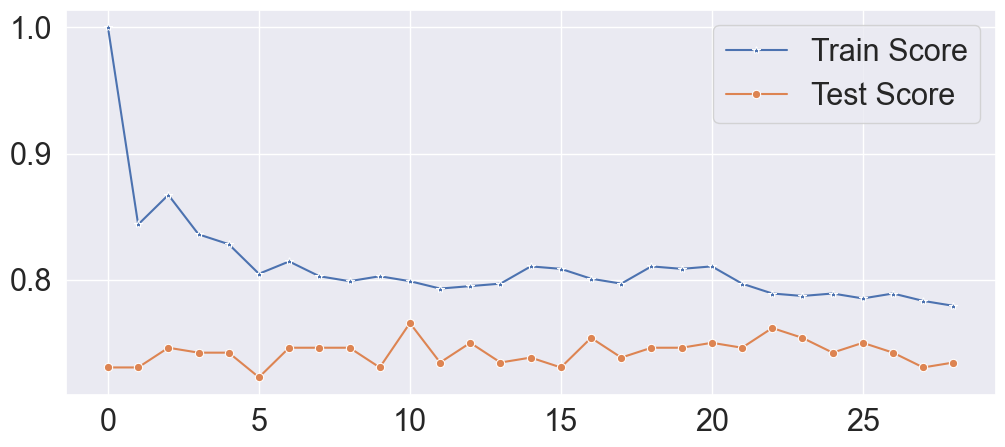

In [62]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')

In [63]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

# Model Performance Analysis

## 1. Confusion Matrix

A **Confusion Matrix** is a tool used in evaluating the performance of a classification algorithm. It provides a detailed breakdown of the model's predictions, offering insights into its strengths and weaknesses.

![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)

#### Components:

For a binary classification:

- **True Positive (TP)**: Cases where the model predicted Positive and the actual class was also Positive.
- **True Negative (TN)**: Cases where the model predicted Negative and the actual class was also Negative.
- **False Positive (FP)**: Cases where the model predicted Positive but the actual class was Negative. (Also known as Type I Error)
- **False Negative (FN)**: Cases where the model predicted Negative but the actual class was Positive. (Also known as Type II Error)

Visual Representation for Binary Classification:

|                  | Predicted Positive | Predicted Negative |
|------------------|--------------------|--------------------|
| Actual Positive  | True Positive (TP) | False Negative (FN)|
| Actual Negative  | False Positive (FP)| True Negative (TN) |

For multi-class classification, the matrix will have more rows and columns to cover all classes, but the core idea remains the same.

#### Derived Metrics:

From the confusion matrix, we can calculate several important metrics:

- **Accuracy**: It's the ratio of correctly predicted instances to the total instances. `(TP + TN) / (TP + TN + FP + FN)`
- **Precision**: Out of all the positive predictions made by the model, how many were actually correct. `TP / (TP + FP)`
- **Recall or Sensitivity**: Out of all actual positive instances, how many were correctly predicted by the model. `TP / (TP + FN)`
- **Specificity**: Out of all actual negative instances, how many were correctly predicted by the model. `TN / (TN + FP)`
- **F1 Score**: The balance between Precision and Recall. It's computed as `2 * (Precision * Recall) / (Precision + Recall)`

#### Why is it Important?

1. **Deep Insights**: A confusion matrix provides a more detailed view of your model's performance than just looking at accuracy.
2. **Handling Imbalanced Datasets**: In cases of class imbalance, accuracy might be misleading. A confusion matrix helps in understanding the performance of the model for each class.
3. **Model Tuning**: By understanding where the model is making mistakes (like more false positives or more false negatives), we can fine-tune it accordingly.

---

### ***In the famous cancer example***:

- Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

- Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

- Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

- Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.


![](https://cdn-images-1.medium.com/max/1600/0*9r99oJ2PTRi4gYF_.jpg)

For Reference: https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327

In [64]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0   1  All
True                   
0          142  25  167
1           35  54   89
All        177  79  256

Text(0.5, 5.049999999999999, 'Predicted label')

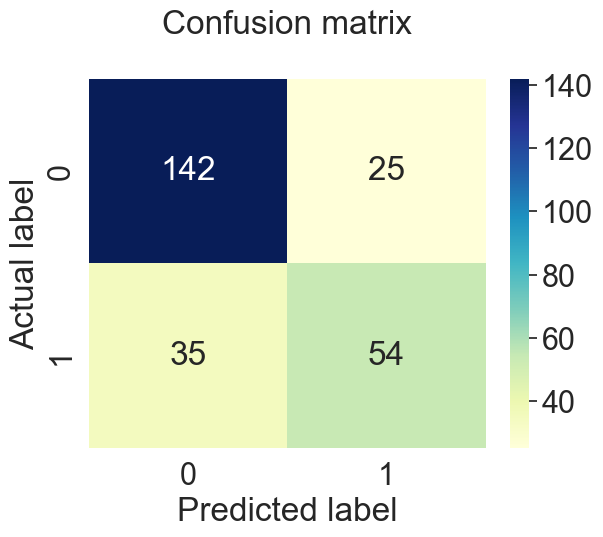

In [65]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 2. Classification Report

The **Classification Report** is a summary of the performance metrics for a classification model. It's a convenient tool provided by libraries like `scikit-learn` to quickly assess the performance of a model across each class in a classification problem. It's especially useful when dealing with multi-class problems.

#### Precision Score
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.
  - Precision quantifies the number of correct positive predictions made. It's the ratio of correctly predicted positive observations to the total predicted positives.
  - High precision relates to the low false positive rate.

        TP – True Positives
        FP – False Positives

        Precision – Accuracy of positive predictions.
        Precision = TP/(TP + FP)
        
   
#### Recall Score
Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.
  - Recall represents the ability of the classifier to find all the positive samples. It's the ratio of correctly predicted positive observations to all the actual positives.
  - High recall indicates that the class is correctly recognized (a small number of false negatives).

        FN – False Negatives

        Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
        Recall = TP/(TP+FN)
        
#### F1 Score
F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 
  - The F1-Score is the weighted average of Precision and Recall. It tries to find the balance between precision and recall and can be particularly useful when the class distribution is imbalanced.
  - It ranges between 0 (worst) and 1 (best).
  
        F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
        F1 Score takes into account precision and the recall. 
        It is created by finding the the harmonic mean of precision and recall.

        F1 = 2 x (precision x recall)/(precision + recall)

#### Support
Support is the number of actual occurrences of the class in the specified dataset. For a balanced dataset, it's similar for both the classes. It can highlight imbalances in class distribution.


##### Format

In the classification report, for each class, the above metrics (Precision, Recall, F1-Score, Support) are presented in a tabular form.

At the end of the report, macro and weighted averages of the metrics across all classes can also be provided, giving a holistic view of the classifier's performance.

Report which includes Precision, Recall and F1-Score.

For Reference: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/ : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [66]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



## 3. ROC - AUC

### ROC (Receiver Operating Characteristic) Curve:

The **ROC Curve** is a graphical representation that illustrates the diagnostic ability of a binary classification system as its discrimination threshold is varied. Essentially, it provides a tool to visually examine the tradeoff between the ability of a model to correctly identify positive instances and its tendency to mistakenly classify negative instances as positive.

ROC-AUC is a powerful tool for understanding the performance of binary classifiers in various decision threshold settings. It allows to get a robust understanding of a model's overall ability to discriminate between positive and negative class instances. This is particularly useful when the costs of false positives and false negatives differ significantly, or when class distributions are imbalanced.

### AUC (Area Under the Curve):

The **AUC** represents the area underneath the ROC curve. AUC provides a scalar value, which summarizes the overall performance of the model across all thresholds. It's especially useful when you want to compare the performance of different models.

### Key Components:

1. **True Positive Rate (Sensitivity or Recall)**: 
   - The ratio of actual positive cases that are correctly identified by the model. 
   - Formula: `True Positives / (True Positives + False Negatives)`

2. **False Positive Rate (1 - Specificity)**: 
   - The ratio of actual negative cases that are incorrectly identified as positive by the model.
   - Formula: `False Positives / (False Positives + True Negatives)`

### Insights from ROC:

- A ROC curve plots the True Positive Rate vs. the False Positive Rate at various threshold settings. 
- The diagonal line from (0,0) to (1,1) represents the 'no-discrimination' line, akin to random guessing. A model with perfect discriminatory abilities will have an ROC curve that passes through the top left corner of the plot (0,1), indicating 100% sensitivity and 100% specificity.
- A model with a curve that lies above the diagonal line is better than random guessing, while a curve below the line is worse than random guessing.

### Insights from AUC:

- AUC ranges from 0 to 1. 
   - An AUC of 1 implies the model has perfect discriminatory ability, while an AUC of 0.5 implies the model performs no better than random guessing.
   - Generally, the higher the AUC, the better the model's ability to differentiate between positive and negative classes.
- If you have two models and are unsure which one performs better for classification, comparing their AUCs can be a good way to identify the better model for predicting both the positive and negative classes.


Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo



In [67]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

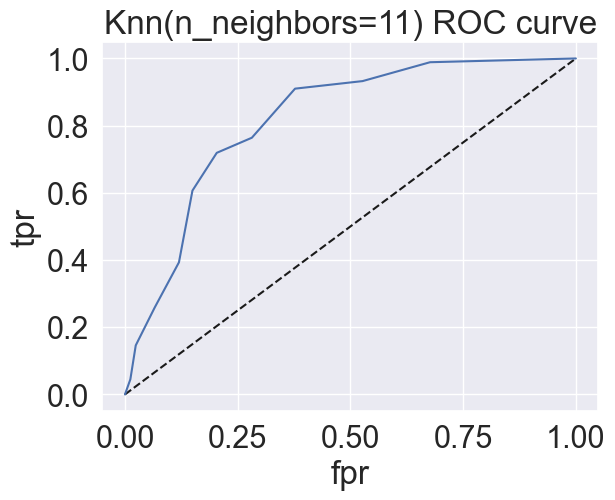

In [68]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [69]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096

# Hyper Parameter optimization

Hyperparameters are parameters that are not learned from data and are set prior to the start of the training process. They play a crucial role in training a machine learning model, and their correct setting can significantly improve performance, whereas a sub-optimal setting can lead to under-performing models. 

## What is Grid Search?

**Grid Search** is a brute-force approach to hyperparameter tuning. The main idea behind it is to take a subset of the hyperparameter space and evaluate the model performance for each point in that subset. This subset, organized in a grid-like fashion, is where the name "Grid Search" comes from.

Grid Search offers a systematic approach to hyperparameter tuning, ensuring that the best combination within the defined grid is found. However, it can be computationally expensive and might not be feasible for all problems or datasets. Alternatives like Randomized Search or Bayesian Optimization might be more efficient for very high-dimensional spaces, but grid search remains a valuable tool in a data scientist's toolkit for many scenarios.

### How does Grid Search work?

1. **Defining the Grid**: 
    - First, for each hyperparameter, a discrete set of values to explore is defined. These values are often based on experience, research, or previous experiments.
    - For instance, in the context of a Support Vector Machine, possible hyperparameters might include the type of kernel, the value of the C parameter, or the gamma parameter.

2. **Model Training and Evaluation**:
    - For each combination of hyperparameters:
        1. The model is trained using the training data.
        2. The model is evaluated using the validation data.
        3. Performance metric(s) (e.g., accuracy, F1-score) are recorded.

3. **Selection**:
    - After all combinations are evaluated, the set of hyperparameters that resulted in the best performance on the validation data is selected.

### Practical Example

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid. 

Suppose, you defined the grid as:

a1 = [0,1,2,3,4,5]

a2 = [10,20,30,40,5,60]

a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.

It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.

### Computational Cost:

The main drawback of grid search is its computational cost. Given that it evaluates the model for each combination in the grid, the number of required trainings and evaluations can grow rapidly as the grid's dimensionality increases. This growth can lead to grid search being very time-consuming, especially when dealing with large datasets or complex models.

In [70]:
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}


## Food for thoughts

### Implications of a High `n_neighbors` Value:

1. **Generalization Over Details**: A larger \( k \) means the algorithm is considering more neighboring points before making a decision. This leads to more generalized decisions, smoothing over potential noise or minor variations in the data.

2. **Potential Loss of Sensitivity**: While increasing \( k \) can help mitigate noise, it may also make the algorithm less sensitive to genuine local patterns in the data. 

3. **Computational Considerations**: Predictions might become slower with a higher \( k \), as the algorithm must sort and compare a test instance to more training instances.

### Reasons Grid Search Might Suggest a High `n_neighbors`:

1. **Noisy Dataset**: A high degree of noise or many outliers can make smaller \( k \) values unreliable. A higher \( k \) can average out this noise.

2. **Complex Data Distributions**: If data points from different classes are interspersed or if there's significant overlap between classes, a larger \( k \) can help in capturing the broader trend instead of local fluctuations.

3. **Overfitting with Smaller \( k \)**: Lower values of \( k \), like \( k=1 \), can lead to overfitting where the model becomes too tailored to the training data. If a smaller \( k \) is capturing noise or idiosyncrasies in the training set and not generalizing well to the validation set, Grid Search might lean towards a larger \( k \) to improve validation performance.

### Actions to Consider:

1. **Data Visualization**: If the data is low-dimensional, visualize it to understand class distributions and separations. Visualizing can provide insights into why a larger \( k \) is being favored.

2. **Inspect Data Quality**: Reassess your dataset for noise, outliers, or incorrect labels. Cleaning the dataset can sometimes lead to better performance with more typical \( k \) values.

3. **Feature Relevance**: Ensure that all features used are relevant. Irrelevant or weakly relevant features can dilute the distance metric, making larger neighborhoods more effective.

4. **Feature Scaling**: k-NN is sensitive to feature scales. Ensure features are appropriately scaled, typically using methods like Min-Max scaling or Standard Scaling.

5. **Consider Weighted k-NN**: Instead of giving equal weight to all \( k \) neighbors, consider using a weighted scheme where closer neighbors have more influence on the prediction.

6. **Re-examine Validation Scheme**: Ensure you're using a robust validation method, like k-fold cross-validation. This ensures that the chosen `n_neighbors` generalizes well across different subsets of the data.

7. **Set Boundaries in Grid Search**: If you have domain knowledge suggesting a very high \( k \) is not practical or appropriate, you can set an upper limit for `n_neighbors` during the grid search.